In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# === 🔹 Chargement des fichiers ===

# Charger le jeu de données de détection
df1 = pd.read_excel("/kaggle/input/detect/detect_dataset.xlsx", sheet_name="Sheet1")
df1 = df1.rename(columns={"Output (S)": "label"})

# Charger le jeu de données de classification
df2 = pd.read_csv("/kaggle/input/defaut-electrique/classData.csv") 

# === 🔹 Nettoyage  ===

# Supprimer les lignes avec des valeurs manquantes
df1 = df1.dropna()
df2 = df2.dropna()

# === 🔹 Vérifications ===

print("\n📌 Vérification des valeurs manquantes - detect_dataset :")
print(df1.isnull().sum())

print("\n📌 Vérification des valeurs manquantes - classData :")
print(df2.isnull().sum())

print("\n✅ Nombre total de lignes - detect_dataset :", len(df1))
print("✅ Nombre total de lignes - classData :", len(df2))

# Résumé
if len(df1) == 12001:
    print("\n✅ detect_dataset : aucune valeur manquante, 12 001 lignes valides.")
else:
    print("\n⚠ detect_dataset contient des valeurs manquantes ou un nombre de lignes inattendu.")

if len(df2) == 7861:
    print("✅ classData : aucune valeur manquante, 7 861 lignes valides.")
else:
    print("⚠ classData contient des valeurs manquantes ou un nombre de lignes inattendu.")



📌 Vérification des valeurs manquantes - detect_dataset :
label    0
Ia       0
Ib       0
Ic       0
Va       0
Vb       0
Vc       0
dtype: int64

📌 Vérification des valeurs manquantes - classData :
G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

✅ Nombre total de lignes - detect_dataset : 12001
✅ Nombre total de lignes - classData : 7861

✅ detect_dataset : aucune valeur manquante, 12 001 lignes valides.
✅ classData : aucune valeur manquante, 7 861 lignes valides.


In [2]:
# 🧠 Prétraitement pour la détection (df1)
X = df1[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]
y = df1['label']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Résultat
print("\n📊 Données prêtes pour l'entraînement du modèle de détection.")
print("X_train shape:", X_train.shape)
print("y_train distribution:\n", y_train.value_counts())


# 🧠 Prétraitement pour la classification (df2)

# Sélection des entrées
X_class = df2[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']]

# Sélection des sorties : les colonnes binaires [G, C, B, A]
y_class = df2[['G', 'C', 'B', 'A']]

# Normalisation
scaler_class = StandardScaler()
X_class_scaled = scaler_class.fit_transform(X_class)

# Split en jeu d'entraînement et de test
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_scaled, y_class, test_size=0.2, random_state=42)

# Résultat
print("\n📊 Données prêtes pour l'entraînement du modèle de classification.")
print("Xc_train shape:", Xc_train.shape)
print("yc_train exemple :\n", yc_train.head())



📊 Données prêtes pour l'entraînement du modèle de détection.
X_train shape: (9600, 6)
y_train distribution:
 label
0    5199
1    4401
Name: count, dtype: int64

📊 Données prêtes pour l'entraînement du modèle de classification.
Xc_train shape: (6288, 6)
yc_train exemple :
       G  C  B  A
432   1  0  0  1
7196  0  0  0  0
3027  0  1  1  0
2937  0  1  1  0
5438  1  1  1  1


# Distribution des variables

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

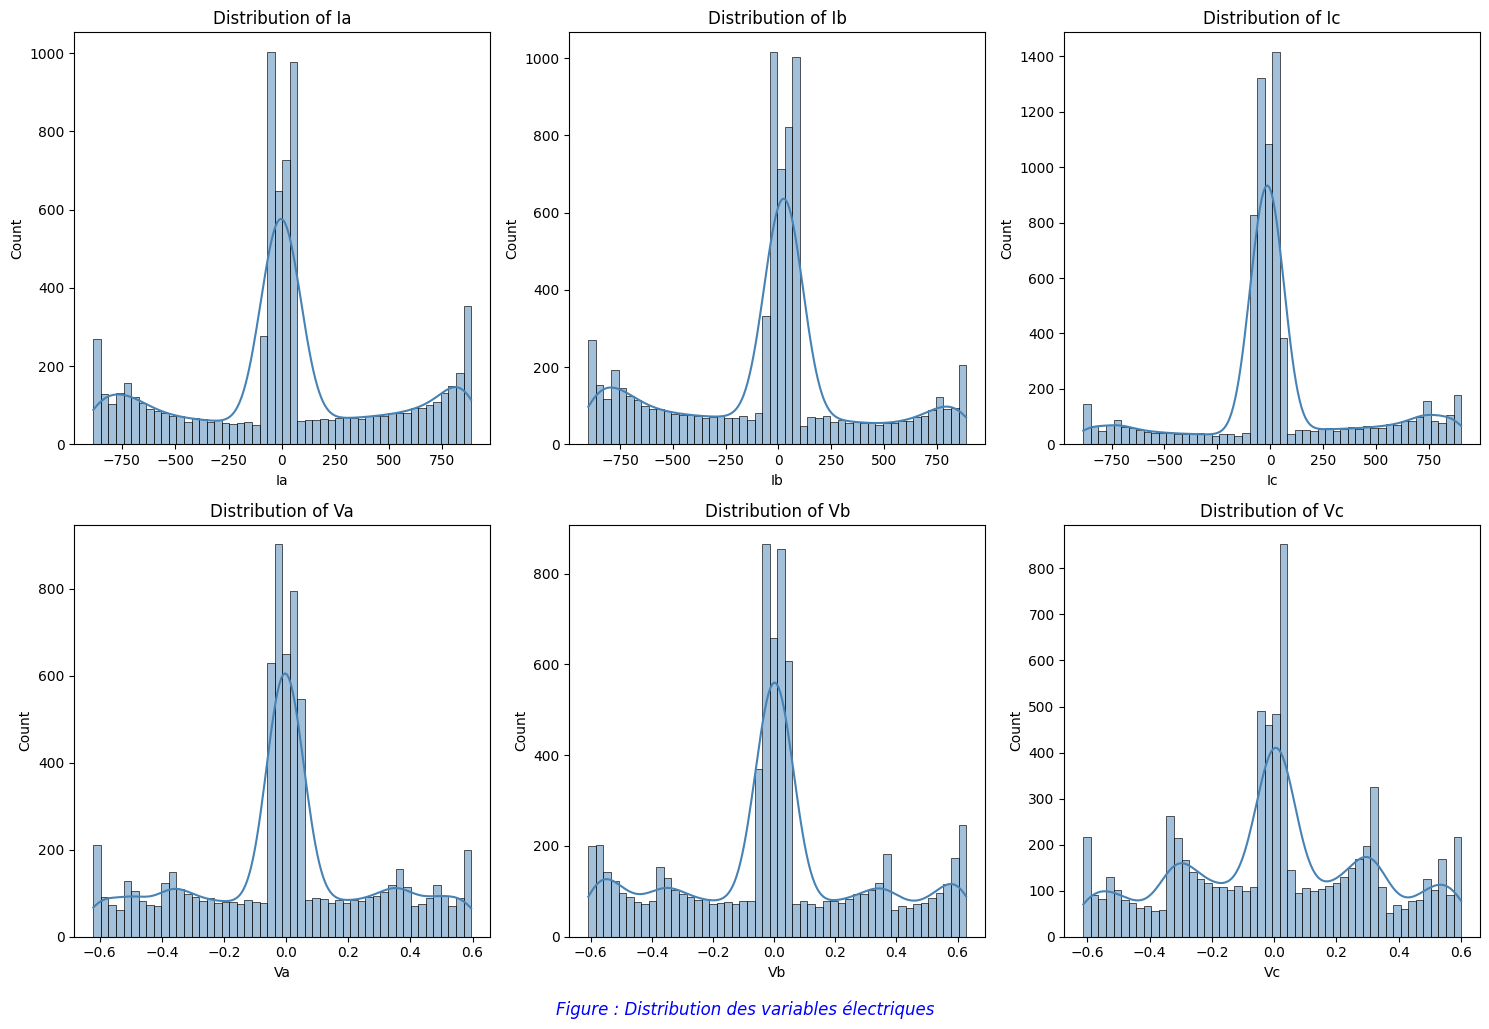

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger ton dataset (exemple CSV, remplace par ton fichier)
df = pd.read_csv(r"/kaggle/input/defaut-electrique/classData.csv")

# Sélectionne les variables à visualiser
variables = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

# Taille du graphique
plt.figure(figsize=(15, 10))

# Boucle sur chaque variable
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)  # 2 lignes, 3 colonnes
    sns.histplot(df[var], bins=50, kde=True, color="steelblue")
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")

plt.tight_layout()

# Ajouter une légende en bas (comme ta figure)
plt.figtext(0.5, -0.02, "Figure : Distribution des variables électriques",
            wrap=True, horizontalalignment='center', fontsize=12, style='italic', color='Blue')

plt.show()
